https://towardsdatascience.com/avatar-meets-data-visualization-60631f86ba7d

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
#loads both sodapoppin and xqcow chat datasets and combines them
def load_data():
    sodapoppin = pd.read_csv("data/sodapoppin.csv")
    sodapoppin["Streamer"] = "sodapoppin"
    
    xqcow = pd.read_csv("data/xqcow.csv")
    xqcow["Streamer"] = "xqcow"
    
    merged_chats = pd.concat([sodapoppin,xqcow])
    
    return merged_chats

In [4]:
load_data().head()

,Message_Datetime,Name,Moderator,VIP,Subscriber,Is_First_Message,Message_len,qtd_msgs_15_secs,Message,Banned,Streamer
0,44548.058067,Mhepps,0,0,0,0,42,1,"i just woke up, where is mr strimmer Madge",0,sodapoppin
1,44548.058148,Pispet,0,0,1,0,53,1,maarionete the weebs are being horni again Cal...,0,sodapoppin
2,44548.058218,Maarionete,0,0,0,0,10,1,PANIC webs,0,sodapoppin
3,44548.058322,justTNK,0,0,1,0,24,1,squchaGasm Kiss me mario,0,sodapoppin
4,44548.058391,Maarionete,0,0,0,0,11,2,vulpes3Kiss,0,sodapoppin


In [5]:
# calculating and adding sentiment score to dataframe
def sentiment_scores(df):
    
    merged_chats= df.astype({'Message': 'str'})
    senti_lyze = SentimentIntensityAnalyzer()
    merged_chats.reset_index(inplace=True, drop=True)
    merged_chats[['neg', 'neu', 'pos', 'compound']] = merged_chats['Message'].apply(senti_lyze.polarity_scores).apply(pd.Series)
    
    return merged_chats

In [6]:
start_time = datetime.now()
chat_df = sentiment_scores(load_data())
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print("Finished adding sentiment scores")

Duration: 0:06:30.895947
Finished adding sentiment scores


In [7]:
chat_df.head()

,Message_Datetime,Name,Moderator,VIP,Subscriber,Is_First_Message,Message_len,qtd_msgs_15_secs,Message,Banned,Streamer,neg,neu,pos,compound
0,44548.058067,Mhepps,0,0,0,0,42,1,"i just woke up, where is mr strimmer Madge",0,sodapoppin,0.000,1.000,0.000,0.0000
1,44548.058148,Pispet,0,0,1,0,53,1,maarionete the weebs are being horni again Cal...,0,sodapoppin,0.000,1.000,0.000,0.0000
2,44548.058218,Maarionete,0,0,0,0,10,1,PANIC webs,0,sodapoppin,0.801,0.199,0.000,-0.6166
3,44548.058322,justTNK,0,0,1,0,24,1,squchaGasm Kiss me mario,0,sodapoppin,0.000,0.517,0.483,0.4215
4,44548.058391,Maarionete,0,0,0,0,11,2,vulpes3Kiss,0,sodapoppin,0.000,1.000,0.000,0.0000


In [8]:
chat_df[["neg","neu","pos","compound"]].describe()

,neg,neu,pos,compound
count,1.751664e+06,1.751664e+06,1.751664e+06,1.751664e+06
mean,6.303204e-02,8.368162e-01,8.882359e-02,1.294486e-02
std,1.997078e-01,3.140882e-01,2.422625e-01,2.370065e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.996000e-01
25%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,9.995000e-01


In [9]:
#Gets a sample of the dataframe, sample of both streamers
#Example: passing sample_size=100 will return df with 100 rows of sodapoppin and 100 xqcow data points (200 total)
def get_sample(df,sample_size):
        
    #drops all rows where neutral is 1 to remove some of the noise
    df = df[df["neu"]!=1]
    
    soda_df = df[df["Streamer"]=="sodapoppin"]
    xqcow_df = df[df["Streamer"]=="xqcow"]
    
    #gets a random sample of the dataframe based on passed n from both streamers chats
    
    soda_df = df[df["Streamer"]=="sodapoppin"]
    xqcow_df = df[df["Streamer"]=="xqcow"]
    
    soda_df_sample = soda_df[:sample_size]
    soda_df_sample = soda_df_sample.sample(n=sample_size, random_state=1)
    
    xqcow_df_sample = xqcow_df[:sample_size]
    xqcow_df_sample = xqcow_df_sample.sample(n=sample_size, random_state=1)
    
    merged_samples = pd.concat([xqcow_df_sample,soda_df_sample])
    
    return merged_samples 

In [10]:
def sentiment_dist(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    #create array for x axis
    n = len(df['pos'])
    X = np.arange(n)

    #bar plot
    fig = plt.figure()
    plt.barh(X, df['pos'])
    plt.barh(X, -df['neg'])
    
    #plt.rcParams.update({'font.size':13})
    #plt.xlim([-.16,.22])
    #plt.yticks(ticks=X, labels=df['Streamer'], rotation='0')
    
    plt.xlabel('Sentiment Score')
    plt.ylabel('Sample_n')
    plt.title("Distribution of Sentiment Scores")

In [11]:
sample = get_sample(chat_df,1000)

In [12]:
sample[["neg","neu","pos","compound"]].describe()

,neg,neu,pos,compound
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.210259,0.372114,0.378123,0.081707
std,0.305161,0.284706,0.381323,0.474738
min,0.000000,0.000000,0.000000,-0.996800
25%,0.000000,0.000000,0.000000,-0.361200
50%,0.000000,0.382000,0.275000,0.296000
75%,0.388500,0.619250,0.730000,0.421500
max,1.000000,0.950000,1.000000,0.999200


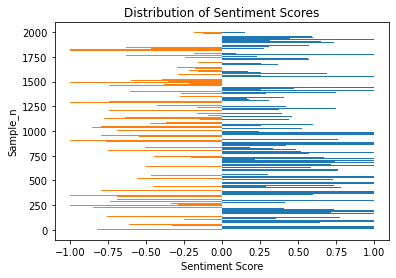

In [13]:
sentiment_dist(sample)

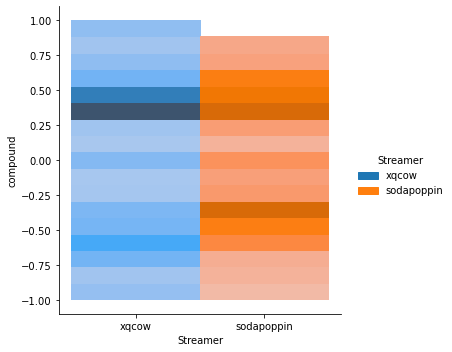

In [14]:
sns.displot(sample, y="compound", x="Streamer",hue="Streamer")

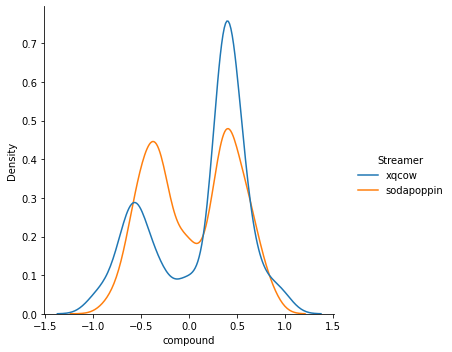

In [15]:
sns.displot(sample, x="compound", hue="Streamer", kind="kde")

In [1]:
full_chat = ""
for i in sample:
    full_chat + = sample["Message"]

NameError: name 'sample' is not defined

In [28]:
#https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def remove_emoji(string):
    import re

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string) # no emoji

In [46]:
with open("Output.txt", "w") as text_file:
    
    full_str = ""
    for i in sample["Message"]:
        try:
            text_file.write(remove_emoji(i))
            full_str += i
        except:
            text_file.write("emoji")

In [47]:
full_str

'EZ ClapLULW FAKE STORIESSMARTEST UK PASSENGERS OMEGALULEZKKonaW WTFEZ JETsandwiches at a gun shotEZWeirdChamp don\'t mock uk!games playedOMEGALUL NO SHOT OMEGALUL NO SHOTMEGALUL YESEZEZEZPepeLaugh OH NOD: CvvxqcCursed KILL HIM xqcCursed KILL HIMEZ ClapOMEGALUL FARMING UK JOKES OMEGALUL FARMING UK JOKES OMEGALUL FARMING UK JOKES OMEGALUL FARMING UK JOKES OMEGALUL FARMING UK JOKESTRUEEZEZ .EZEZMEGALUL KILLShoot em xdOMEGALUL truexqcL joe_theblonde is staying in the jungle using Twitch Prime! xqcL Thanks so much for re-subbing xqcL And continuing to support the stream! xqcLOMEGALUL AYO WTF?EZGachiPls banned from airlinegachiHYPER NICEEZEZHave we realised that JP is just a borderline terroristshoot them all xqcGob shoot them all xqcGob shoot them all xqcGob  xqcGobYEAH SO BEHAVE NICELYTHEY CAN FUCK U IF THEY WANTTHEY ARE DUTCH IDIOT OMEGALULEZyeah it happenSHOOTPepeLaugh JuiceTime yeah thanks:nerd_face: I NEED YOU TO LEAVE :nerd_face: I NEED YOU TO LEAVE :nerd_face: I NEED YOU TO LEAVE :n

In [48]:
import stylecloud
from wordcloud import STOPWORDS

#stylecloud.gen_stylecloud(file_path="Output.txt", palette="cmocean.sequential.Matter_16", 
#                          background_color="white", icon_name= 'fas fa-tint',
#                          colors=['#3A7FC4', '#3A7FC4', '#3A7FC4'], stopwords=STOPWORDS,
#                           collocations=False)